In [1]:
import os
os.chdir('../../')

In [4]:
import os
import numpy as np
import pandas as pd

save_dir = 'reports/sana/euler_dpm_unipc'
solvers = ['Euler', 'DPM-Solver', 'UniPC']
cfgs    = [1.5, 3.5, 5.5, 7.5, 9.5]
nfes    = [5, 6, 8, 10]

# 1. Load all RMSEs into a long-form DataFrame
records = []
for solver in solvers:
    for cfg in cfgs:
        for nfe in nfes:
            fn = f"{solver}_{cfg}_{nfe}_FS3.0.txt"
            path = os.path.join(save_dir, fn)
            if os.path.isfile(path):
                try:
                    rmse = float(open(path).readline())
                except Exception:
                    rmse = np.nan
            else:
                rmse = np.nan
            records.append({
                'CFG':    cfg,
                'Solver': solver,
                'NFE':    nfe,
                'RMSE':   rmse
            })

df_long = pd.DataFrame(records)

# 2. For each CFG, pivot into a nice 2D table (rows=Solver, cols=NFE)
for cfg in cfgs:
    df_pivot = (
        df_long[df_long['CFG'] == cfg]
        .pivot(index='Solver', columns='NFE', values='RMSE')
        .reindex(index=solvers, columns=nfes)
    )
    df_pivot.index.name = 'Solver'
    df_pivot.columns.name = 'NFE'
    print(f"\nCFG = {cfg}")
    print(df_pivot.to_string(float_format='{:,.4f}'.format))

print("\nDone.")



CFG = 1.5
NFE            5      6      8      10
Solver                                
Euler      0.4639 0.4206 0.3557 0.3102
DPM-Solver 0.4181 0.3671 0.2926 0.2399
UniPC      0.4262    NaN    NaN    NaN

CFG = 3.5
NFE            5      6      8      10
Solver                                
Euler      0.6741 0.6226 0.5388 0.4686
DPM-Solver 0.6747 0.6224 0.5308 0.4487
UniPC         NaN    NaN    NaN    NaN

CFG = 5.5
NFE            5      6      8      10
Solver                                
Euler      0.9983 0.9523 0.8683 0.7762
DPM-Solver 1.0143 0.9736 0.8901 0.7926
UniPC         NaN    NaN    NaN    NaN

CFG = 7.5
NFE            5      6      8      10
Solver                                
Euler      1.2273 1.2004 1.1428 1.0747
DPM-Solver 1.2377 1.2179 1.1687 1.1053
UniPC         NaN    NaN    NaN    NaN

CFG = 9.5
NFE            5      6      8      10
Solver                                
Euler      1.3702 1.3568 1.3273 1.2900
DPM-Solver 1.3730 1.3649 1.3462 1.3158
UniPC    

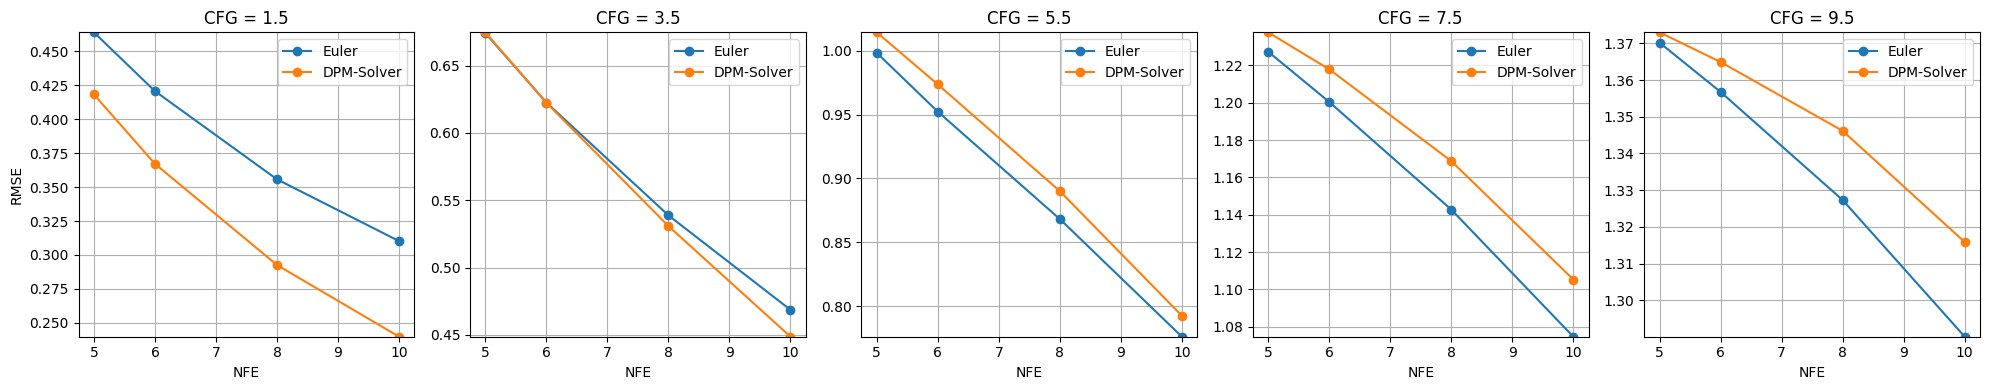

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

save_dir = 'reports/sana/euler_dpm_unipc'
solvers = ['Euler', 'DPM-Solver']
cfgs    = [1.5, 3.5, 5.5, 7.5, 9.5]
nfes    = [5, 6, 8, 10]

# Load RMSEs into DataFrame
records = []
for solver in solvers:
    for cfg in cfgs:
        for nfe in nfes:
            path = os.path.join(save_dir, f"{solver}_{cfg}_{nfe}_FS3.0.txt")
            if os.path.isfile(path):
                try:
                    rmse = float(open(path).readline())
                except Exception:
                    rmse = np.nan
            else:
                rmse = np.nan
            records.append({'CFG': cfg, 'Solver': solver, 'NFE': nfe, 'RMSE': rmse})

df = pd.DataFrame(records)

# Create horizontal subplots without shared y-axis
fig, axes = plt.subplots(1, len(cfgs), figsize=(20, 4), sharey=False)

for ax, cfg in zip(axes, cfgs):
    pivot = (
        df[df['CFG'] == cfg]
        .pivot(index='Solver', columns='NFE', values='RMSE')
        .reindex(index=solvers, columns=nfes)
    )
    for solver in solvers:
        y = pivot.loc[solver].values
        ax.plot(nfes, y, marker='o', label=solver)
    # Auto-set y-limits based on data
    y_vals = pivot.values.flatten()
    y_vals = y_vals[~np.isnan(y_vals)]
    ymin, ymax = y_vals.min(), y_vals.max()
    ax.set_ylim(ymin, ymax)
    
    ax.set_title(f'CFG = {cfg}')
    ax.set_xlabel('NFE')
    if cfg == cfgs[0]:
        ax.set_ylabel('RMSE')
    ax.grid()        
    ax.legend()

plt.tight_layout()
plt.show()
